<a href="https://colab.research.google.com/github/Habibu-Ahmad/Deepfake_Detection/blob/main/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

**Loading Data and Setup**

In [3]:
df = pd.read_csv("/content/wildeep_dataset.csv")
X = df.drop("label", axis=1)
y = df["label"]

# Convert string labels to numerical labels
y = y.map({'fake': 0, 'real': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
df.head()

,entropy,wrapped,noise,blur,keypoints,blobs,label
0,7.068116,6.221255,0.076813,119.322771,0,0,real
1,7.291953,6.221255,0.064823,93.817606,8,8,fake
2,7.188982,6.221255,0.079195,121.461672,2,1,real
3,7.319922,6.221255,0.081468,120.140357,0,0,fake
4,7.349324,6.221255,0.078249,94.747030,1,3,real


In [5]:
df.shape

(112160, 7)

**Random Forest**

Accuracy: 0.916191155492154
Precision: 0.9154917686787674
Recall: 0.9250191930393244
F1 Score: 0.9202308214528174


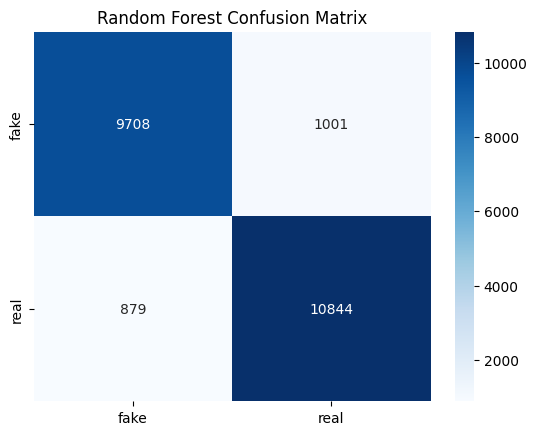

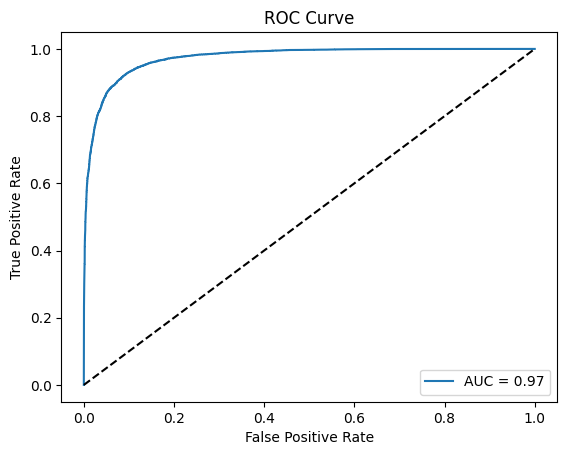

In [6]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=3,
    class_weight='balanced',
    bootstrap=False,
    random_state=42
)
rf_model.fit(X_train, y_train)

#Evaluate
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**SVM**

SVM Accuracy: 0.7245898716119828
SVM Precision: 0.7059653814724017
SVM Recall: 0.8106286786658705
SVM F1 Score: 0.7546855146124524


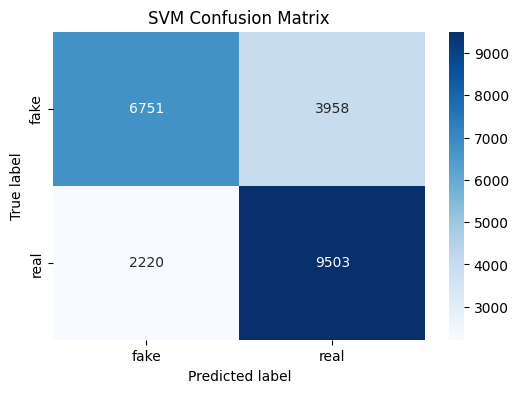

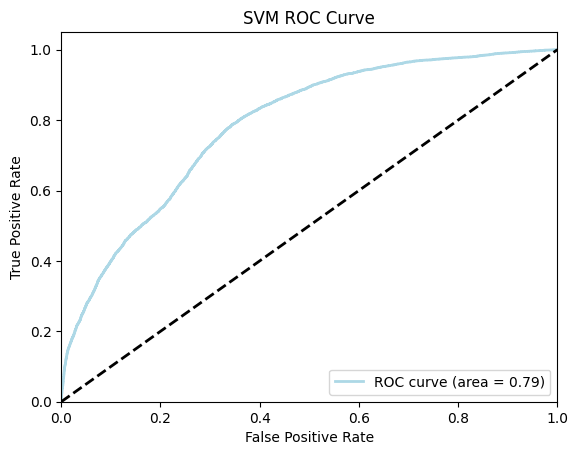

In [7]:
# Initialize and train SVM classifier
svm_model = SVC(
    kernel='rbf',
    C=10,
    gamma=0.01,
    probability=True,     # if you want predict_proba
    class_weight='balanced',  # if your dataset is imbalanced
    random_state=1
)

svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, pos_label=1)
svm_recall = recall_score(y_test, svm_y_pred, pos_label=1)
svm_f1 = f1_score(y_test, svm_y_pred, pos_label=1)


# Print metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)

# Generate and plot confusion matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.title("SVM Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Plot ROC curve
svm_probs = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, svm_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='lightblue', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

XGBoost Accuracy: 0.8064818116975749
XGBoost Precision: 0.7817127156159365
XGBoost Recall: 0.8736671500469163
XGBoost F1 Score: 0.8251359516616315


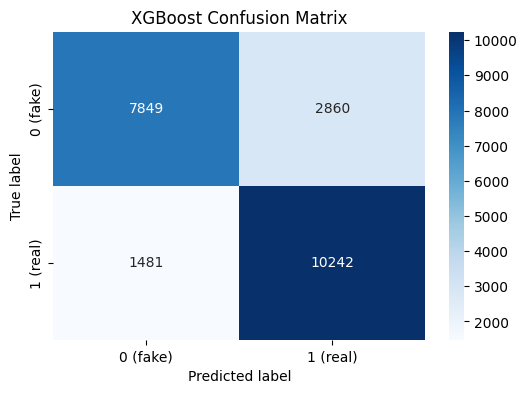

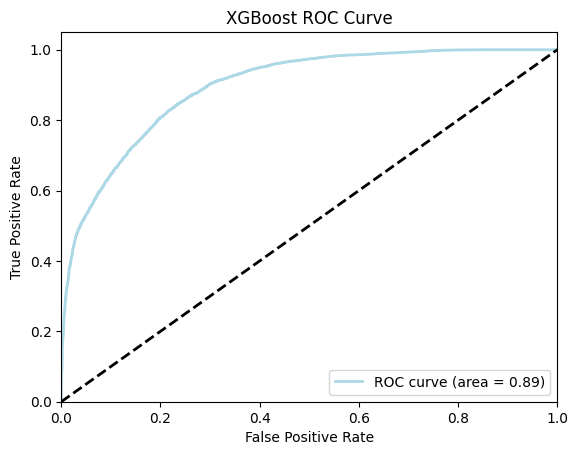

In [8]:
# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=3,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    reg_alpha=0.01,
    reg_lambda=1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate performance - using numeric labels (0/1)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred, pos_label=1)
xgb_recall = recall_score(y_test, xgb_y_pred, pos_label=1)
xgb_f1 = f1_score(y_test, xgb_y_pred, pos_label=1)

# Print metrics
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1 Score:", xgb_f1)

# Generate and plot confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=['0 (fake)', '1 (real)'], yticklabels=['0 (fake)', '1 (real)'])
plt.title("XGBoost Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='lightblue', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

**KNN**

Accuracy: 0.8884183309557775
Precision: 0.8934790030727211
Recall: 0.8929454917683187
F1 Score: 0.893212167754597


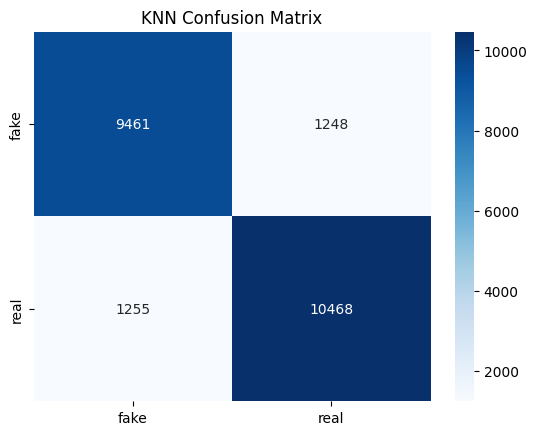

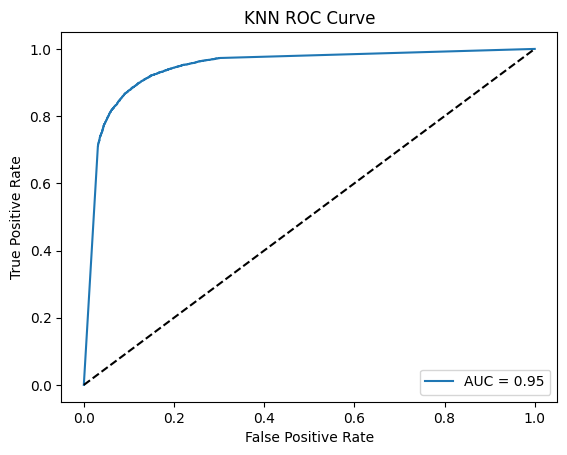

In [9]:
# Initialize and train KNN classifier
knn_model = KNeighborsClassifier(
    n_neighbors=4,  # Number of neighbors to use
    weights='distance',  # 'uniform' for equal weight, 'distance' for weighted by distance
    algorithm='auto',  # 'auto' chooses the best algorithm based on data
    leaf_size=10,  # Leaf size for KDTree and BallTree (affects speed)
    p=2,  # p=2 for Euclidean distance, p=1 for Manhattan distance
    metric='minkowski',  # Metric to use for distance calculation
)
knn_model.fit(X_train, y_train)

# Evaluate
y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)[:, 1]  # Probability of positive class

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.title("KNN Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.show()
